<a href="https://colab.research.google.com/github/BG2EBZ/Optimization-for-learning/blob/main/handin1_final_1018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Fill in group number and member names:

In [ ]:
GROUP = ""
NAME1 = ""
NAME2 = ""

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
# Optimization for learning - FRTN50

## Assignment 1

The goal of this assignment is to become familiar with some of the steps involved in solving an optimization problem. In this assignment, you will form Fenchel dual problems, find gradients and/or proximal operators, and implement the proximal gradient method.

__Problem__ The problem we will solve is the following constrained problem

$$
\begin{align}\label{eq:the_problem}\tag{1}
	\underset{x \in S}{\text{minimize}}\; \tfrac{1}{2}x^T Q x + q^Tx
\end{align}
$$

where $Q\in\mathbb{S}_{++}^{n}$, $q\in\mathbb{R}^{n}$ and $S\subseteq\mathbb{R}^{n}$ is a set defined by the points $a,b\in\mathbb{R}^{n}$, $a\leq b$, such that

\begin{align*}
	S = \{x \in \mathbb{R}^{n}: a \leq x \leq b \}.
\end{align*}

I.e., we are going to minimize a quadratic function over an $n$-dimensional box. Recall that, the vector inequality $a\leq b$ means that

\begin{align*}
	a_{i} \leq b_{i}
\end{align*}

for each $i=1,\ldots,n$. Define the function $f:\mathbb{R}^{n}\rightarrow\mathbb{R}$ such that

\begin{align*}
	f(x) = \tfrac{1}{2}x^T Q x + q^Tx
\end{align*}

for each $x\in\mathbb{R}^{n}$ and let $\iota_{S}:\mathbb{R}^{n}\rightarrow\mathbb{R}\cup\{\infty\}$ denote the indicator function of the set $S$, i.e.,

\begin{align*}
	\iota_{S}(x) =
	\begin{cases}
		0 		& \text{if }x\in S, \\
		\infty 	& \text{if }x\in \mathbb{R}^n \setminus S.
	\end{cases}
\end{align*}

Problem \eqref{eq:the_problem} can then be written as

\begin{align}\label{eq:the_problem_mod}\tag{2}
	\underset{x \in \mathbb{R}^{n}}{\text{minimize}}\; f(x) + \iota_{S}(x).
\end{align}

__Solution method__ To solve optimization problem \eqref{eq:the_problem_mod}, we will use the _proximal gradient method_. It solves problems of the form

\begin{align}\label{eq:pgprob}\tag{3}
	\underset{x \in \mathbb{R}^{n}}{\text{minimize}}\; f(x) + g(x)
\end{align}

where $f:\mathbb{R}^{n}\rightarrow\mathbb{R}$ is differentiable and $g:\mathbb{R}^{n}\rightarrow\mathbb{R}\cup\{\infty\}$ is proximable, i.e., $\prox_{\gamma g}$ can be cheaply computed. The proximal gradient method (with constant step-size) is given by:

- Pick some arbitrary initial guess $x^0\in\R^{n}$ and step-size $\gamma>0$.
- For $k=0,1,2\ldots$, let
\begin{align}\label{eq:pg}\tag{4}
				x^{k+1} = \prox_{\gamma g}\left(x^k - \gamma \nabla f(x^k)\right).
\end{align}
- Stop when $x^k$ is deemed to have converged.

In this assignment, we simply run the proximal gradient method a large fixed number of iterations and plot the norm of the fixed-point residual $\norm{x^{k+1} - x^k}_{2}$ (also known as the step-length), of each step to make sure it converges to zero. Since the experiments are run on a computer, zero means smaller than machine precision, which usually is around $10^{-15}$.

The step-size parameter $\gamma$ in the \eqref{eq:pg} will affect the convergence. It should be tuned to the problem or chosen based on properties of $f$ and $g$. In particular, suppose that $f$ and $g$ are proper, closed and convex.
If $f$ is $\beta$-smooth for some parameter $\beta>0$, the maximal step-size to guarantee convergence is $\gamma < \frac{2}{\beta}$.

Below are the tasks that you need to solve. Keep this in mind:
- The suggested exercises in the exercise compendium found on the Canvas course page, up until and including the chapter "Proximal gradient method - basics", is relevant for this assignment.
- Carefully motivate every step in your calculations.
- Use __figures__ and __tables__ to motivate your answers.
- Figures must have appropriately labeled axes and must be referenced in the main text.
- Your code should be written in a quite general manner, i.e., if a question is slightly modified, it should only require slight modifications in your code as well.
- Comment your code well.
- Make sure you plot in such a way that small quantities (e.g., $\norm{x^{k+1} - x^k}_{2}$) are visible. In particular, use log-linear plots, where the quantity that should go to $0$ is on the $y$-axis using logarithmic scale, and the iteration number $k$ on the $x$-axis using linear scale.
- What you need to submit to Canvas:
    - This jupyter notebook containing your solutions.
    - An exported pdf version of the jupyter notebook. (One way to do this is to print the notebook in your web browser, and then save as pdf.)

This table shows which lectures are needed in order to solve task 1-7:
    
| Task | Lectures |
| ---- | -------- |
| 1    | 2, 3     |
| 2    | 4        |
| 3    | 3, 4     |
| 4    | 2, 4     |
| 5    | 3, 4     |
| 6    | 5        |
| 7    | 4        |

Task 8-10 can be solved after you have solved task 1-7.

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 1:

Show that $f$ and $\iota_{S}$ in (2) are convex and show that constraint qualification (CQ) holds. You are allowed to assume that $\relint S \neq \emptyset$. Note that $f$ and $\iota_{S}$ also are closed, but you do not need to prove this.

__Solution:__

Convexity of $f$:

$$
f(x) = \frac{1}{2} x^\top Q x + q^\top x, \qquad Q \in \mathbb{S}^{n}_{++}, \; q \in \mathbb{R}^n.
$$

Two standard arguments:

- Hessian test: $\nabla^2 f(x) = Q$ for all $x$. Since $Q \succ 0$ , $f$ is strongly convex.

- Sum of convex functions: $\frac{1}{2} x^\top Q x = \frac{1}{2} \|Q^{1/2} x\|_2^2$ (convex quadratic) and $q^\top x$ (linear, hence convex). A sum of convex functions is convex.

So $f$ is convex.

Convexity of $\iota_S$:

The feasible set is the box
$$
S = \{ x \in \mathbb{R}^n : a \leq x \leq b \} = \bigcap_{i=1}^n \{ x : x_i \leq b_i \} \cap \bigcap_{i=1}^n \{ x : -x_i \leq -a_i \},
$$
an intersection of half-spaces $\Rightarrow$ convex.

The indicator of a convex set is convex:
$$
\iota_S(\theta x + (1 - \theta)y) \leq \theta \iota_S(x) + (1 - \theta) \iota_S(y), \qquad \theta \in [0, 1],
$$
since the left side is 0 whenever $x, y \in S$.

Hence $\iota_S$ is convex.



For the composite form $\min_x f(x) + g(x)$ with $g = \iota_S$, a common CQ is

$$
\operatorname{ri}(\operatorname{dom} f) \cap \operatorname{ri}(\operatorname{dom} g) \neq \emptyset.
$$

Here $\operatorname{dom} f = \mathbb{R}^n \Rightarrow \operatorname{ri}(\operatorname{dom} f) = \mathbb{R}^n$, and $\operatorname{dom} g = S \Rightarrow \operatorname{ri}(\operatorname{dom} g) = \operatorname{ri}(S)$. By assumption $\operatorname{ri}(S) \neq \emptyset$, so the intersection is nonempty. Hence the Fenchel–Rockafellar CQ holds.


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 2:

Compute the conjugate functions $f^\ast$ and $\iota_{S}^\ast$. The final expressions are not allowed to be given implicitly via optimization problems. E.g., projection formulas must be solved explicitly.

__Solution:__

Conjugate of $f(x) = \frac{1}{2} x^\top Q x + q^\top x$ with $Q \in \mathbb{S}_{++}^n$

$$
f^*(y) = \sup_x \left\{ y^\top x - \frac{1}{2} x^\top Q x - q^\top x \right\}
= \sup_x \left\{ (y - q)^\top x - \frac{1}{2} x^\top Q x \right\} \\
= -\inf_x \left\{ \frac{1}{2} x^\top Q x - (y - q)^\top x \right\}
= -\inf_x \left\{ \frac{1}{2} (x - Q^{-1}(y - q))^\top Q (x - Q^{-1}(y - q)) - \frac{1}{2} (y - q)^\top Q^{-1}(y - q) \right\}
= \frac{1}{2} (y - q)^\top Q^{-1}(y - q) ,
\quad \text{for all } y \in \mathbb{R}^n. \quad \text{(since the quadratic term is minimized at } x = Q^{-1}(y - q))
$$


Conjugate of $\iota_S$ for the box $S = \{ x : a \leq x \leq b \}$

Because $S$ is a product of intervals, the supremum splits coordinate-wise:
$$
\sup_{x \in S} u^\top x = \sum_{i=1}^n \sup_{x_i \in [a_i, b_i]} u_i x_i = \sum_{i=1}^n \left\{
\begin{array}{ll}
b_i u_i, & u_i \geq 0, \\
a_i u_i, & u_i < 0,
\end{array}
\right.
$$

which is exactly the stated closed form. Since the box is bounded, the support function is finite for all $u$.

support function of a box:
$$
\iota_S^*(u) = \sigma_S(u) = \sup_{x \in S} u^\top x = \sum_{i=1}^n \max\{a_i u_i, b_i u_i\} = b^\top u_+ + a^\top u_-, \quad \operatorname{dom} \iota_S^* = \mathbb{R}^n
$$

where $u_+ = \max(u, 0)$ and $u_- = \min(u, 0)$ are taken elementwise.




$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 3:

Write down a Fenchel dual problem to (2). Show that constraint qualification for the dual problem (CQ-D) holds.

_Attention/hint:_ Keep track of your minus signs.

__Solution:__

Using the Fenchel template
$$
\min_x f(x) + g(x) \Longleftrightarrow \max_y \left( -f^*(-y) - g^*(y) \right),
$$
with $g = \iota_S$, which needs the explicit conjugates:

$f^*(y) = \frac{1}{2}(y - q)^\top Q^{-1}(y - q)$ (since $Q \succ 0$).

$
\iota_S^*(y) = \sigma_S(y) = \sum_{i=1}^n \max\{a_i y_i, b_i y_i\}.
$

Therefore the dual problem is
$$
\max_{y \in \mathbb{R}^n} -\frac{1}{2}(y + q)^\top Q^{-1}(y + q) - \sum_{i=1}^n \max\{a_i y_i, b_i y_i\}.
$$

A convenient case-free expression for the support term is
$$
\sum_{i=1}^n \max\{a_i y_i, b_i y_i\} = \sum_{i=1}^n \left( \frac{a_i + b_i}{2} y_i + \frac{b_i - a_i}{2} |y_i| \right).
$$

A standard Fenchel–Rockafellar CQ on the dual pair is
$$
\operatorname{ri}(\operatorname{dom} f^*) \cap \left( -\operatorname{ri}(\operatorname{dom} \iota_S^*) \right) \neq \emptyset.
$$

Here,

$\operatorname{dom} f^* = \mathbb{R}^n$ , hence $\operatorname{ri}(\operatorname{dom} f^*) = \mathbb{R}^n$.

$\operatorname{dom} \iota_S^* = \mathbb{R}^n$, hence $\operatorname{ri}(\operatorname{dom} \iota_S^*) = \mathbb{R}^n$.

Thus $\mathbb{R}^n \cap (-\mathbb{R}^n) = \mathbb{R}^n \neq \emptyset$, so CQ-D holds.


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 4:

Show that $f$ and $f^*$ are $\beta$-, and $\beta^*$-smooth, respectively. Find expressions for the smallest such parameters $\beta$ and $\beta^*$. For instance, show that for any $\beta' < \beta$ we have that $f$ is not $\beta'$-smooth.

_Hint:_ Later when calculating the smoothness parameters in Pyhton, make sure to read the documentation carefully so that you use the correct function.

__Solution:__

A function $h$ is $\beta$-smooth iff $\nabla h$ is $\beta$-Lipschitz:

$$
\|\nabla h(u) - \nabla h(v)\| \leq \beta \|u - v\| \quad \forall u, v,
$$

equivalently $\|\nabla^2 h(x)\|_2 \leq \beta$ for all $x$.

$
f(x) = \frac{1}{2} x^\top Q x + q^\top x, \nabla f(x) = Qx + q$, $\nabla^2 f(x) = Q$ (constant).

Since $Q \in \mathbb{S}_{++}^n$ is symmetric, $\|\nabla^2 f(x)\|_2 = \|Q\|_2 = \lambda_{\max}(Q)$ for all $x$.


Therefore:
$$
\beta = \lambda_{\max}(Q)
$$
is a smoothness constant for $f$, and it is the smallest one.

Pick a unit eigenvector $v$ of $Q$ with eigenvalue $\lambda_{\max}(Q)$. For any $t \neq 0$:
$$
\frac{\|\nabla f(tv) - \nabla f(0)\|}{|tv - 0|} = \frac{\|Q(tv)\|}{|t|} = \|Qv\| = \lambda_{\max}(Q).
$$
The Lipschitz ratio equals $\lambda_{\max}(Q)$, so any $\beta' < \lambda_{\max}(Q)$ violates the inequality. Hence $\beta = \lambda_{\max}(Q)$ is the smallest possible.

$$
f^*(y) = \frac{1}{2}(y - q)^\top Q^{-1}(y - q)
$$

$\nabla f^*(y) = Q^{-1}(y - q)$, $\nabla^2 f^*(y) = Q^{-1}$ (constant).

$\|Q^{-1}\|_2 = \lambda_{\max}(Q^{-1}) = \frac{1}{\lambda_{\min}(Q)}$.


Therefore,
$$
\beta^* = \lambda_{\max}(Q^{-1}) = \frac{1}{\lambda_{\min}(Q)}
$$
is a smoothness constant for $f^*$, and it is the smallest one}.

Let $w$ be a unit eigenvector of $Q$ with eigenvalue $\lambda_{\min}(Q)$. Then $w$ is an eigenvector of $Q^{-1}$ with eigenvalue $1/\lambda_{\min}(Q)$. For any $t \neq 0$,

$$
\frac{\|\nabla f^*(tw) - \nabla f^*(0)\|}{\|tw - 0\|} = \frac{\|Q^{-1}(tw)\|}{|t|} = \|Q^{-1} w\| = \frac{1}{\lambda_{\min}(Q)}.
$$

Thus any $\beta^{*'} < 1/\lambda_{\min}(Q)$ fails.

Summary:

$$
\text{Smallest smoothness of } f : \quad \beta = \lambda_{\max}(Q). \\[6pt]
\text{Smallest smoothness of } f^* : \quad \beta^* = \lambda_{\max}(Q^{-1}) = \frac{1}{\lambda_{\min}(Q)}. \\
$$



$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
$\DeclareMathOperator*{\argmin}{argmin}$

---
### Task 5:

Compute $\nabla f$, $\nabla f^\ast$, $\prox_{\gamma\iota_{S}}$ and $\prox_{\gamma\iota_{S}^\ast}$. The final expressions are not allowed to be given implicitly via optimization problems. E.g., projection formulas must be solved explicitly.


__Solution:__

$f(x) = \frac{1}{2} x^\top Q x + q^\top x$ with $Q \in \mathbb{S}_{++}^n$:
$$
    \nabla f(x) = Qx + q
$$

$f^*(y) = \frac{1}{2} (y - q)^\top Q^{-1} (y - q)$:
$$
\nabla f^*(y) = Q^{-1}(y - q)
$$


For the box $S = \{x : a \leq x \leq b\}$, the prox of the indicator is the Euclidean projection onto $S$, it does not depend on $\gamma$:

$$
\left[ \operatorname{prox}_{\gamma \, \iota_S}(y) \right]_i = \min\{\max\{y_i, a_i\}, b_i\} \quad \text{for } i = 1, \ldots, n.
$$


Use Moreau's identity $\operatorname{prox}_{\gamma g^*}(y) = y - \gamma \, \operatorname{prox}_{g/\gamma}(y/\gamma)$ with $g = \iota_S$. Since $\operatorname{prox}_{\iota_S} = \Pi_S$ (projection), we get

$$
\operatorname{prox}_{\gamma \, \iota_S^*}(y) = y - \gamma \, \Pi_S\left( \frac{y}{\gamma} \right) = y - \Pi_{[\gamma a, \gamma b]}(y),
$$

which is :

$$
\left[ \operatorname{prox}_{\gamma \, \iota_S^*}(y) \right]_i =
\begin{cases}
y_i - \gamma a_i, & y_i < \gamma a_i, \\
0, & \gamma a_i \leq y_i \leq \gamma b_i, \\
y_i - \gamma b_i, & y_i > \gamma b_i.
\end{cases}
$$

Equivalently,

$$
\left[ \operatorname{prox}_{\gamma \, \iota_S^*}(y) \right]_i = y_i - \min\{\max\{y_i, \gamma a_i\}, \gamma b_i\}.
$$


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 6:

Based on your results above, write explicitly out the proximal gradient update rule (4) for both the primal and the dual problem. Use $x$ as the primal variable and $\mu$ as the dual variable.

_Attention/hint:_ Keep track of your minus signs.

__Solution:__

Primal PG update $\min_x f(x) + \iota_S(x)$

$\nabla f(x) = Qx + q$
$\operatorname{prox}_{\gamma \iota_S}(y) = \Pi_S(y) = \left[ \min\{\max\{y_i, a_i\}, b_i\} \right]_i$


So,
$$
x^{k+1} = \Pi_S\left(x^k - \gamma (Q x^k + q)\right)
$$

componentwise:
$$
x_i^{k+1} = \min\left\{ \max\left\{ x_i^k - \gamma \left( (Qx^k)_i + q_i \right), a_i \right\}, b_i \right\}, \quad i = 1, \ldots, n.
$$

Valid with any $0 < \gamma < \frac{2}{\lambda_{\max}(Q)}$.



From the Fenchel dual we take the equivalent minimization:
$$
\min_\mu F(\mu) + G(\mu), \quad F(\mu) = \frac{1}{2}(\mu + q)^\top Q^{-1}(\mu + q), \quad G(\mu) = \sigma_S(\mu) = \iota_S^*(\mu).
$$

$\nabla F(\mu) = Q^{-1}(\mu + q)$.
$\operatorname{prox}_{\eta G}(y) = \operatorname{prox}_{\eta \, \iota_S^*}(y) = y - \Pi_{[\eta a, \eta b]}(y)$
\\


Thus the dual PG step is

$$
\mu^{k+1} = \operatorname{prox}_{\eta \, \iota_S^*} \left( \mu^k - \eta \, Q^{-1}(\mu^k + q) \right)
= \left( \mu^k - \eta \, Q^{-1}(\mu^k + q) \right) - \Pi_{[\eta a, \eta b]} \left( \mu^k - \eta \, Q^{-1}(\mu^k + q) \right).
$$

Equivalently, componentwise with $y_i^k := \mu_i^k - \eta \left[Q^{-1}(\mu^k + q)\right]_i$,
$$
\mu_i^{k+1} =
\begin{cases}
y_i^k - \eta a_i, & y_i^k < \eta a_i, \\
0, & \eta a_i \leq y_i^k \leq \eta b_i, \\
y_i^k - \eta b_i, & y_i^k > \eta b_i,
\end{cases}
\quad i = 1, \ldots, n.
$$

Valid with any $0 < \eta < \frac{2}{\beta^*} = \frac{2}{\lambda_{\max}(Q^{-1})} = 2 \lambda_{\min}(Q)$.



$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 7:

Suppose that $\mu^\star\in\R^{n}$ is an optimal solution to the dual problem you found in Task 3. Given $\mu^\star$, and __starting from the optimality condition for the dual problem (given by _Fermat's rule_)__, recover an optimal point $x^{\star}\in\R^{n}$ to the primal problem (2), and show that this $x^{\star}$ is in fact an optimal solution to the primal problem (2). Motivate each step in your argument carefully.

__Solution:__

From Task 3 the dual (concave maximization) is
$$
\max_{\mu \in \mathbb{R}^n} D(\mu) := -f^*(-\mu) - \iota_S^*(\mu) = -\frac{1}{2}(\mu + q)^\top Q^{-1}(\mu + q) - \sigma_S(\mu),
$$
where $\sigma_S = \iota_S^*$ is the support function of the box $S$.

For a concave maximization, Fermat's rule says
$$
0 \in \partial(-D)(\mu^\star).
$$

Compute $\partial(-D)$:
$$
-D(\mu) = f^*(-\mu) + \sigma_S(\mu), \qquad \nabla f^*(y) = Q^{-1}(y - q).
$$

By the chain rule,
$$
\nabla_\mu f^*(-\mu) = -\nabla f^*(-\mu) = -Q^{-1}(-\mu - q) = Q^{-1}(\mu + q).
$$

Thus,
$$
0 \in Q^{-1}(\mu^\star + q) + \partial \sigma_S(\mu^\star).
$$

Define
$$
x^\star := -Q^{-1}(\mu^\star + q) = \nabla f^*(-\mu^\star).
$$

Then
$$
-Q^{-1}(\mu^\star + q) \in \partial \sigma_S(\mu^\star)
\quad \Longleftrightarrow \quad
x^\star \in \partial \sigma_S(\mu^\star).
$$

By the conjugacy/subgradient symmetry,
$$
x \in \partial g^*(\mu) \Longleftrightarrow \mu \in \partial g(x),
$$
so with $g = \iota_S$ and $g^* = \sigma_S$, gives
$$
\mu^\star \in \partial \iota_S(x^\star) = N_S(x^\star)
$$

Consequences:

$N_S(x^\star) \neq \emptyset$ implies $x^\star \in S$ (primal feasibility).

Coordinatewise normal-cone conditions (complementarity):
$$
\left\{
\begin{aligned}
a_i < x_i^\star < b_i &\Rightarrow \mu_i^\star = 0, \\
x_i^\star = a_i &\Rightarrow \mu_i^\star \leq 0, \\
x_i^\star = b_i &\Rightarrow \mu_i^\star \geq 0.
\end{aligned}
\right.
$$

Compute the primal gradient at $x^\star$:
$$
\nabla f(x^\star) = Qx^\star + q = Q\left(-Q^{-1}(\mu^\star + q)\right) + q = -(\mu^\star + q) + q = -\mu^\star.
$$

Combine:
$$
0 \in \nabla f(x^\star) + \partial \iota_S(x^\star) = (-\mu^\star) + \partial \iota_S(x^\star).
$$

Since $\mu^\star \in \partial \iota_S(x^\star)$, the right-hand side contains $0$. This is exactly Fermat's rule for the primal problem
$$
\min_x f(x) + \iota_S(x).
$$

Hence $x^\star$ is optimal for the primal.  
Because $Q \succ 0$ makes $f$ strongly convex and $\iota_S$ is convex, the primal minimizer is unique; thus this $x^\star$ is the primal solution.

Given an optimal dual $\mu^\star$,
$$
x^\star = -Q^{-1}(\mu^\star + q) \quad \text{and} \quad \mu^\star \in N_S(x^\star) \; \text{(so } x^\star \in S\text{)}.
$$

Then $0 \in \nabla f(x^\star) + \partial \iota_S(x^\star)$, proving primal optimality.




$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 8:

Use your results above to fill in the functions below.

__Solution:__

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

def quad(x,Q,q):
    """
    quad(x,Q,q) computes the quadratic function (1/2)x'Qx + q'x

    :param x: the variable of the quadratic function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: (1/2)x'Qx + q'x
    """
    # Write your solution here
    x = np.asarray(x)
    Q = np.asarray(Q)
    q = np.asarray(q)
    return 0.5 * x @ (Q @ x) + q @ x

def quadconj(mu,Q,q):
    """
    quadconj(mu,Q,q) computes the conjugate function of the
    quadratic function (1/2)x'Qx + q'x, evaluated at mu

    :param mu: the variable of the conjugate function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: conjugate of (1/2)x'Qx + q'x, evaluated at mu
    """
    mu = np.asarray(mu)
    Q = np.asarray(Q)
    q = np.asarray(q)
    v = mu - q
    y = np.linalg.solve(Q, v)      # Q^{-1} v
    return 0.5 * v @ y


def box(x,a,b):
    """
    box(x,a,b) computes the indicator function of the box contraint
    [a,b]

    :param x: the variable of the indicator function
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :return: 0 if x is in [a,b] and infinity otherwise
    """
    if np.all(a <= x) and np.all(x <= b):
        return 0
    else:
        return np.Inf

def boxconj(mu,a,b):
    """
    boxconj(mu,a,b) computes the conjugate function of the indicator function
    of the box contraint [a,b], evaluated at mu

    :param mu: the variable of the conjugate function
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :return: conjugate of the indicator function of the box contraint [a,b], evaluated at mu
    """
    # Write your solution here
    mu = np.asarray(mu)
    a = np.asarray(a)
    b = np.asarray(b)
    return np.sum(0.5*(a+b)*mu + 0.5*(b-a)*np.abs(mu))


def grad_quad(x,Q,q):
    """
    grad_quad(x,Q,q) computes the gradient of the quadratic function (1/2)x'Qx + q'x

    :param x: the variable of the quadratic function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: gradient of (1/2)x'Qx + q'x
    """
    # Write your solution here
    x = np.asarray(x)
    Q = np.asarray(Q)
    q = np.asarray(q)
    return Q @ x + q

def grad_quadconj(mu,Q,q):
    """
    grad_quadconj(mu,Q,q) computes the gradient of the conjugate function of the
    the quadratic function (1/2)x'Qx + q'x, evaluated at mu

    :param mu: the variable of the conjugate function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: gradient of the conjugate of (1/2)x'Qx + q'x, evaluated at mu
    """
    # Write your solution here
    mu = np.asarray(mu)
    Q = np.asarray(Q)
    q = np.asarray(q)
    return np.linalg.solve(Q, mu - q)

def prox_box(x,a,b,gamma):
    """
    prox_box(x,a,b,gamma) computes proximal operator of the indicator function
    of the box contraint [a,b], evaluated at x

    :param x: the variable of the poximal operator
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :param gamma: the step-size parameter
    :return: proximal operator of the indicator function of the
    box contraint [a,b], evaluated at x
    """
    # Write your solution here
    x = np.asarray(x)
    a = np.asarray(a)
    b = np.asarray(b)
    return np.minimum(np.maximum(x, a), b)

def prox_boxconj(mu,a,b,gamma):
    """
    prox_box(mu,a,b,gamma) computes proximal operator of the conjugate function of
    the indicator function of the box contraint [a,b], evaluated at mu

    :param mu: the variable of the poximal operator
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :param gamma: the step-size parameter
    :return: proximal operator of the conjugate function of the indicator function of the
    box contraint [a,b], evaluated at mu
    """
    mu = np.asarray(mu)
    a = np.asarray(a)
    b = np.asarray(b)
    lower = gamma * a
    upper = gamma * b
    proj = np.minimum(np.maximum(mu, lower), upper)
    return mu - proj

def dual_to_primal(mu,Q,q,a,b):
    """
    dual_to_primal(mu,Q,q,a,b) computes the solution x* to the primal problem
    given a solution mu* to the dual problem.

    :param mu: the dual variable
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :return: the extracted primal variable
    """
    # Write your solution here
    mu = np.asarray(mu)
    Q = np.asarray(Q)
    q = np.asarray(q)
    return -np.linalg.solve(Q, mu + q)

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 9:

Below is a function for generating $Q$, $q$, $a$, and $b$ that define the quadratic function $f$ and the box constraint set $S$. Use Task 8 to solve the primal problem using the proximal gradient method.

In [ ]:
def problem_data():
    """
    problem_data() generates the problem data variables Q, q, a and b

    :return: (Q,q,a,b)
    """
    rs = np.random.RandomState(np.random.MT19937(np.random.SeedSequence(1)))
    n = 20
    Q = rs.randn(n,n)
    Q = Q.T@Q
    q = rs.randn(n)
    a = -rs.rand(n)
    b = rs.rand(n)
    return Q, q, a, b

(Q,q,a,b) = problem_data()

__a)__ What seems to be the best choice of $\gamma$?

__Solution:__

$$
\gamma = \frac{1}{\beta}
$$

Because this is the standard best constant step for proximal gradient  with an 𝐿-smooth 𝑓. It guarantees convergence and typically gives the fastest monotone decrease without oscillations.

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__b)__ Does the upper bound $\gamma < \frac{2}{\beta}$ seem reasonable?

__Solution:__

Yes.

Inside the box, the step is plain gradient descent on a quadratic:
$$
x^{k+1} = x^k - \gamma (Qx^k + q).
$$

The error $e^k = x^k - x^\star$ evolves as
$$
e^{k+1} = (I - \gamma Q)e^k.
$$

Convergence $\Leftrightarrow \rho(I - \gamma Q) < 1$, i.e.
$$
\max_i |1 - \gamma \lambda_i(Q)| < 1 \quad \Longleftrightarrow \quad 0 < \gamma < \frac{2}{\lambda_{\max}(Q)} = \frac{2}{\beta}.
$$

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

Test different initial points for the algorithm:

__c)__ Does this affect the point the algorithm converges to?

__Solution:__

_Fill in your solution here!_


No. With a valid step size $0 < \gamma < 2/\beta$, the algorithm converges to the same point $x^\star$ regardless of the initial point.




beta = 6.652583e+01,  gamma = 1.503176e-02

Convergence summary per start:
  zeros         iters= 1696   ||x - x_ref||2 = 0.000e+00
  midpoint      iters= 1556   ||x - x_ref||2 = 1.187e-13
  left bound a  iters= 1519   ||x - x_ref||2 = 2.909e-13
  right bound b  iters= 1602   ||x - x_ref||2 = 3.815e-13
  far random 1  iters= 1631   ||x - x_ref||2 = 1.466e-10
  far random 2  iters= 1736   ||x - x_ref||2 = 3.215e-13
  rand 1        iters= 1602   ||x - x_ref||2 = 1.468e-10
  rand 2        iters= 1677   ||x - x_ref||2 = 5.538e-13
  rand 3        iters= 1617   ||x - x_ref||2 = 1.468e-10
  rand 4        iters= 1683   ||x - x_ref||2 = 1.401e-13
  rand 5        iters= 1701   ||x - x_ref||2 = 1.354e-13
  rand 6        iters= 1725   ||x - x_ref||2 = 1.784e-14
  rand 7        iters= 1737   ||x - x_ref||2 = 2.028e-13
  rand 8        iters= 1668   ||x - x_ref||2 = 1.470e-10
  rand 9        iters= 1720   ||x - x_ref||2 = 3.415e-13
  rand 10       iters= 1706   ||x - x_ref||2 = 1.466e-10

All solutio

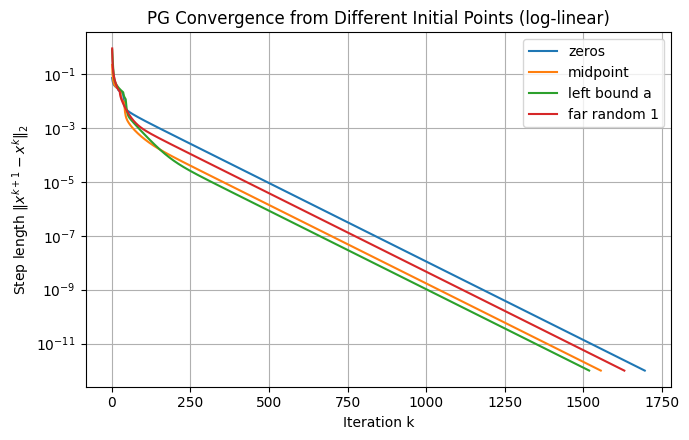

In [ ]:
# Write your solution here
# ===== Proximal Gradient from Multiple Initial Points =====

def pg_solve(Q, q, a, b, x0, gamma, max_iters=20_000, tol=1e-12):
    """
    Projected/proximal gradient for min 0.5 x^T Q x + q^T x  s.t. a <= x <= b
    Uses your grad_quad and prox_box functions.
    Returns: (x_star, residuals, f_history)
    """
    x = np.minimum(np.maximum(x0, a), b)  # ensure feasible start
    residuals = []
    f_hist = []

    for k in range(max_iters):
        y = x - gamma * grad_quad(x, Q, q)      # gradient step
        x_next = prox_box(y, a, b, gamma)       # projection (prox of indicator)
        r = np.linalg.norm(x_next - x)          # step length
        residuals.append(r)
        f_hist.append(quad(x, Q, q))            # objective value (indicator is 0 on box)
        x = x_next
        if r < tol:
            break

    return x, np.array(residuals), np.array(f_hist)

# Lipschitz constant β = λ_max(Q) (Q is symmetric)
beta  = np.linalg.eigvalsh(Q).max()
gamma = 1.0 / beta   # recommended safe step size

print(f"beta = {beta:.6e},  gamma = {gamma:.6e}")

# --- Build a set of diverse initial points ---
rng = np.random.default_rng(123)
inits  = []
labels = []

inits.append(np.zeros_like(q))              ; labels.append("zeros")
inits.append((a + b) / 2)                   ; labels.append("midpoint")
inits.append(a.copy())                      ; labels.append("left bound a")
inits.append(b.copy())                      ; labels.append("right bound b")
inits.append(10 * rng.standard_normal(q.size)); labels.append("far random 1")
inits.append(-10 * rng.standard_normal(q.size)); labels.append("far random 2")
for i in range(6, 16):
    inits.append(rng.standard_normal(q.size))
    labels.append(f"rand {i-5}")

# --- Run PG from each start ---
solutions, residuals_all, iters = [], [], []
for x0 in inits:
    x_star, res, f_hist = pg_solve(Q, q, a, b, x0, gamma, max_iters=20_000, tol=1e-12)
    solutions.append(x_star)
    residuals_all.append(res)
    iters.append(len(res))

solutions = np.vstack(solutions)
iters = np.array(iters)

# Compare final points (should be the same up to tiny numerical noise)
x_ref = solutions[0]
diffs = np.linalg.norm(solutions - x_ref, axis=1)
print("\nConvergence summary per start:")
for lab, it, d in zip(labels, iters, diffs):
    print(f"  {lab:12s}  iters={it:5d}   ||x - x_ref||2 = {d:.3e}")

print("\nAll solutions identical (≤ 1e-8)?",
      "YES" if diffs.max() < 1e-8 else "NO",
      f"(max deviation = {diffs.max():.3e})")

# --- Plot: step-length vs iteration (log-linear) for a few starts ---
idxs_to_plot = [0, 1, 2, 4]  # zeros, midpoint, a, far random 1
plt.figure(figsize=(7,4.5))
for idx in idxs_to_plot:
    r = residuals_all[idx]
    plt.semilogy(range(1, len(r)+1), r, label=labels[idx])
plt.xlabel("Iteration k")
plt.ylabel(r"Step length $\|x^{k+1}-x^k\|_2$")
plt.title("PG Convergence from Different Initial Points (log-linear)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__d)__ Carefully motivate theoretically why/why not it affects the final point. _Hint:_ Look at the objective function in (2).

__Solution:__

No.

With a valid step size $0 < \gamma < 2/\beta$, the proximal-gradient method converges to the same point $x^\star$ regardless of the initial point.


$f(x) = \frac{1}{2} x^\top Q x + q^\top x$ with $Q \succ 0$ is $m$-strongly convex with $m = \lambda_{\min}(Q) > 0$.

$\iota_S$ is convex. The sum $F(x) = f(x) + \iota_S(x)$ is therefore strongly convex on $S$.

A strongly convex function has a unique minimizer on a convex set: there exists a unique $x^\star \in S$.

So if the algorithm converges, it can only converge to this unique $x^\star$, independent of the start.


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__e)__ Does your final point $x^{\text{final}}$ satisfy the constraint $x^{\text{final}} \in S$?

__Solution:__

_Fill in your solution here!_

In [ ]:
# Write your solution here
# Check x_final ∈ S =========

def feasibility_report(x, a, b, tol=1e-12):
    """
    Returns a dict with feasibility info of x wrt [a,b].
    Uses a small tolerance to be robust to round-off.
    """
    x = np.asarray(x); a = np.asarray(a); b = np.asarray(b)
    under = np.maximum(a - x, 0.0)         # how far below a (per coord)
    over  = np.maximum(x - b, 0.0)         # how far above b (per coord)
    max_under = under.max(initial=0.0)
    max_over  = over.max(initial=0.0)
    max_viol  = max(max_under, max_over)
    in_S = (max_viol <= tol)
    return {
        "in_S": in_S,
        "max_under": float(max_under),
        "max_over": float(max_over),
        "max_violation": float(max_viol),
        "num_violations": int(np.count_nonzero(under > tol) + np.count_nonzero(over > tol))
    }

# --- Single run example ---
x0 = 10*np.random.default_rng(0).standard_normal(q.size)  # arbitrary start (even outside the box)
x_final, res, f_hist = pg_solve(Q, q, a, b, x0, gamma, max_iters=20000, tol=1e-12)

rep = feasibility_report(x_final, a, b, tol=1e-12)
print("\n[Single-run feasibility check]")
print(f"in_S? {rep['in_S']},  max_violation={rep['max_violation']:.3e}, "
      f"max_under={rep['max_under']:.3e}, max_over={rep['max_over']:.3e}, "
      f"num_violations={rep['num_violations']}")



[Single-run feasibility check]
in_S? True,  max_violation=0.000e+00, max_under=0.000e+00, max_over=0.000e+00, num_violations=0


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__f)__ What about the iterates, do they always satisfy the constraint, $x^k \in S$? Why/why not?

__Solution:__

\textbf{Short answer:}  
Yes. Every iterate $x^k$ is in $S$.

The reason is that the PG update:
$$
x^{k+1} = \operatorname{prox}_{\gamma \iota_S}(x^k - \gamma \nabla f(x^k)) = \Pi_S(x^k - \gamma(Qx^k + q)),
$$
and the projection $\Pi_S : \mathbb{R}^n \to S$ always returns a point in $S$.

Thus, regardless of where $x^k - \gamma \nabla f(x^k)$ lies, the next iterate is feasible. So all iterates (including $x^0$) are in $S$.



$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 10:

Solve the dual problem.

__a)__ Similar to the previous task, find/verify the upper bound on the step-size and find a good step-size choice.

__Solution:__

$
\eta = \frac{1}{\beta^*}
$


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

Let $x^{\text{final}}$ be the final points from Task 9 and $\mu^{\text{final}}$ the final point for the dual problem. Let $\hat{x}^{\text{final}}$ final primal points extracted from the final dual point $\mu^{\text{final}}$ using the expression from Task 7:

__b)__ Are $x^{\text{final}}$ and $\hat{x}^{\text{final}}$ the same?

__Solution:__

_Fill in your solution here!_

In [ ]:
# Write your solution here
# ---- Dual PG solver (minimization form) ----
#   min_mu  F(mu) + G(mu)
#   F(mu) = 0.5 (mu+q)^T Q^{-1} (mu+q)   ->  ∇F(mu) = Q^{-1}(mu+q)
#   G(mu) = σ_S(mu) = i_S^*(mu)          ->  prox_{ηG}(y) = y - Π_[ηa, ηb](y)
def dual_pg_solve(Q, q, a, b, mu0=None, eta=None, max_iters=20000, tol=1e-12):
    n = q.size
    mu = np.zeros(n) if mu0 is None else np.asarray(mu0).copy()

    # Safe step: η = λ_min(Q)  (since β* = ||Q^{-1}|| = 1/λ_min(Q) and we need 0<η<2/β*)
    lam = np.linalg.eigvalsh(Q)
    lam_min = lam.min()
    if eta is None:
        eta = lam_min

    residuals = []
    for k in range(max_iters):
        # gradient step on F
        y = mu - eta * np.linalg.solve(Q, mu + q)   # Q^{-1}(mu+q)
        # prox of σ_S
        mu_next = prox_boxconj(y, a, b, eta)
        r = np.linalg.norm(mu_next - mu)
        residuals.append(r)
        mu = mu_next
        if r < tol:
            break
    return mu, np.array(residuals), eta

# ---- Solve primal with PG to get x_final ----
beta  = np.linalg.eigvalsh(Q).max()
gamma = 1.0 / beta
x0 = np.zeros_like(q)
x_final, res_p, _ = pg_solve(Q, q, a, b, x0, gamma, max_iters=20000, tol=1e-12)

# ---- Solve dual with PG to get mu_final, then recover hat_x_final ----
mu0 = np.zeros_like(q)
mu_final, res_d, eta_used = dual_pg_solve(Q, q, a, b, mu0=mu0, eta=None, max_iters=20000, tol=1e-12)
hat_x_final = dual_to_primal(mu_final, Q, q, a, b)  # = -Q^{-1}(mu+q)

# ---- Compare the two primal points ----
diff_norm = np.linalg.norm(x_final - hat_x_final)
max_abs_diff = np.max(np.abs(x_final - hat_x_final))
print(f"||x_final - hat_x_final||_2 = {diff_norm:.3e}")
print(f"max_i |x_final_i - hat_x_final_i| = {max_abs_diff:.3e}")

# sanity checks (feasibility and KKT sign pattern)
def feasibility_report(x, a, b, tol=1e-10):
    under = np.maximum(a - x, 0.0)
    over  = np.maximum(x - b, 0.0)
    max_viol = max(under.max(initial=0.0), over.max(initial=0.0))
    return bool(max_viol <= tol), float(max_viol)

ok_x, viol_x = feasibility_report(x_final, a, b)
ok_hat, viol_hat = feasibility_report(hat_x_final, a, b)
print(f"x_final feasible? {ok_x} (max violation {viol_x:.2e})")
print(f"hat_x_final feasible? {ok_hat} (max violation {viol_hat:.2e})")



||x_final - hat_x_final||_2 = 9.167e-11
max_i |x_final_i - hat_x_final_i| = 4.708e-11
x_final feasible? True (max violation 0.00e+00)
hat_x_final feasible? True (max violation 1.11e-11)


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__c)__ Is $\hat{x}^{\text{final}}$ in the box $S$?

__Solution:__

_Fill in your solution here!_

In [ ]:
# Write your solution here

beta  = np.linalg.eigvalsh(Q).max()
gamma = 1.0 / beta
x0 = 5*np.random.default_rng(0).standard_normal(q.size)
x_final, _, _ = pg_solve(Q, q, a, b, x0, gamma, max_iters=20000, tol=1e-12)

# Feasibility check: is x_final ∈ [a, b] (within tolerance)?
tol = 1e-12
under = np.maximum(a - x_final, 0.0)   # violations below a
over  = np.maximum(x_final - b, 0.0)   # violations above b
in_S = (under.max() <= tol) and (over.max() <= tol)

print(f"in S? {in_S}  |  max_under={under.max():.3e}, max_over={over.max():.3e}")

in S? True  |  max_under=0.000e+00, max_over=0.000e+00


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__d)__ Let $\mu^k$ be the iterates of the dual method, using the expression from Task 7, extract the primal iterates $\hat{x}^k$ from $\mu^k$. Does $\hat{x}^k$ always satisfy the constraint $\hat{x}^k \in S$?

__Solution:__

No.

The extracted primal iterates $\hat{x}^k = -Q^{-1}(\mu^k + q)$ from the dual iterates need not lie in the box $S$ before convergence.

Only at optimality ($\mu^\star$) do we have $\mu^\star \in N_S(x^\star)$, which enforces $x^\star \in S$. Along the way, $\mu^k$ typically doesn’t satisfy the normal-cone condition, so $\hat{x}^k$ can violate the bounds.


In [ ]:
# Write your solution here

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__e)__ How do the function values $f\left(\hat{x}^k\right)$ develop over the iterations?

__Solution:__


For the primal points extracted from the dual iterates
$$
\hat{x}^k = -Q^{-1}(\mu^k + q),
$$
the sequence $f(\hat{x}^k)$ is not guaranteed to be monotone (it may oscillate), because $\hat{x}^k$ need not be feasible until convergence. However, as $\mu^k \to \mu^\star$ linearly, $\hat{x}^k \to x^\star$ linearly too, and the function values converge to $f(x^\star)$.

For a quadratic,

$$
\frac{\lambda_{\min}(Q)}{2} \|\hat{x}^k - x^\star\|^2
\leq f(\hat{x}^k) - f(x^\star)
\leq \frac{\lambda_{\max}(Q)}{2} \|\hat{x}^k - x^\star\|^2,
$$

so if $\|\hat{x}^k - x^\star\| \leq C \rho^k$ (with $\rho < 1$ from the dual PG step-size), then
$$
f(\hat{x}^k) - f(x^\star) = \mathcal{O}(\rho^{2k})
$$


In [ ]:
# Write your solution here

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__f)__ What about $f\left(\hat{x}^k\right)+\iota_{S}\left(\hat{x}^k\right)$?

__Solution:__


For the primal points extracted from the dual iterates,
$$
\hat{x}^k = -Q^{-1}(\mu^k + q),
$$
we generally do not have $\hat{x}^k \in S$ before convergence. Therefore,
$$
f(\hat{x}^k) + \iota_S(\hat{x}^k) =
\begin{cases}
f(\hat{x}^k), & \text{if } \hat{x}^k \in S, \\
+\infty, & \text{otherwise},
\end{cases}
$$
so the composite value is typically $+\infty$ for most iterations and only becomes finite and then tends to $f(x^\star)$) when $\hat{x}^k$ enters the box.

There is no monotonicity guarantee for this extended-real sequence.


In [ ]:
# Write your solution here